## OCR(OPTICAL CHARACTER RECOGNITION)

This OCR App will be used to extract text from an image of handwritten notes.

#### PIPELINE OF THE APPLICATION

* Take image(Handwritten Notes) ----> Process the image (Computer Vision) -------> LLM (Role assigned as OCR)

| File Type   | Extension        | MIME Type                                                                 |
| ----------- | ---------------- | ------------------------------------------------------------------------- |
| Plain text  | `.txt`           | `text/plain`                                                              |
| HTML        | `.html`          | `text/html`                                                               |
| CSV         | `.csv`           | `text/csv`                                                                |
| JSON        | `.json`          | `application/json`                                                        |
| PDF         | `.pdf`           | `application/pdf`                                                         |
| ZIP         | `.zip`           | `application/zip`                                                         |
| JPEG image  | `.jpg` / `.jpeg` | `image/jpeg`                                                              |
| PNG image   | `.png`           | `image/png`                                                               |
| GIF         | `.gif`           | `image/gif`                                                               |
| MP3 audio   | `.mp3`           | `audio/mpeg`                                                              |
| MP4 video   | `.mp4`           | `video/mp4`                                                               |
| Excel       | `.xls`           | `application/vnd.ms-excel`                                                |
| Excel (new) | `.xlsx`          | `application/vnd.openxmlformats-officedocument.spreadsheetml.sheet`       |
| Word        | `.doc`           | `application/msword`                                                      |
| Word (new)  | `.docx`          | `application/vnd.openxmlformats-officedocument.wordprocessingml.document` |

In [1]:
# pip install opencv-python

In [22]:
import cv2
import matplotlib.pyplot as plt
import google.generativeai as genai
import os
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [3]:
image = cv2.imread('Handwritten_notes.png')

In [4]:
# ITS A COLOUR IMAGE (3D)
image.shape

(1152, 1308, 3)

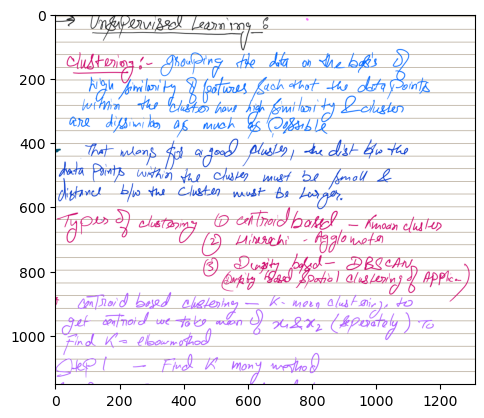

In [5]:
plt.imshow(image)
plt.show()

In [6]:
# by default it is a BGR image (BLUE GREEAN AND REd) which needs to be converted to RGB

In [7]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # THIS WILL CONVERT BGR TO RGB

In [8]:
image.shape

(1152, 1308, 3)

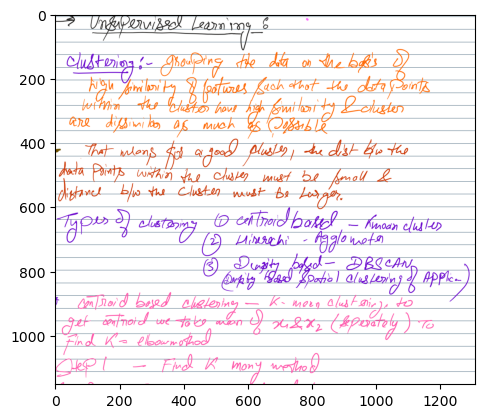

In [9]:
plt.imshow(image)
plt.show()

# Now i can see the original color

In [10]:
# HEre preprocessing these image means converting it to gray scale to black and white or binary

image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)  # RGB ---> GRAYSCALE
# 3D --> 2D

In [11]:
image_gray.shape

(1152, 1308)

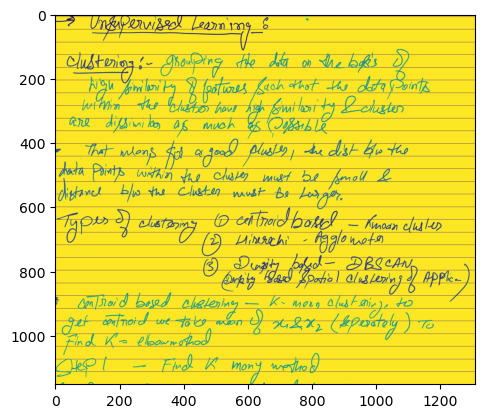

In [12]:
plt.imshow(image_gray)
plt.show()

In [13]:
cv2.imshow('Grey Image',image_gray)
cv2.imshow('Image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
_,image_bw = cv2.threshold(image_gray,170,255,cv2.THRESH_BINARY)

In [15]:
image_bw.shape

(1152, 1308)

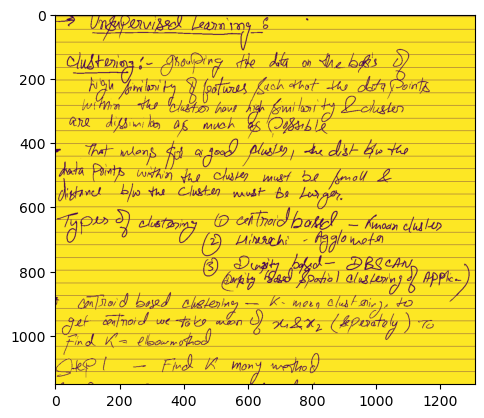

In [16]:
plt.imshow(image_bw)
plt.show()

In [17]:
cv2.imshow('Grey Image',image_gray)
cv2.imshow('Image',image)
cv2.imshow('BLACK & White',image_bw)
cv2.waitKey(0)
cv2.destroyAllWindows()

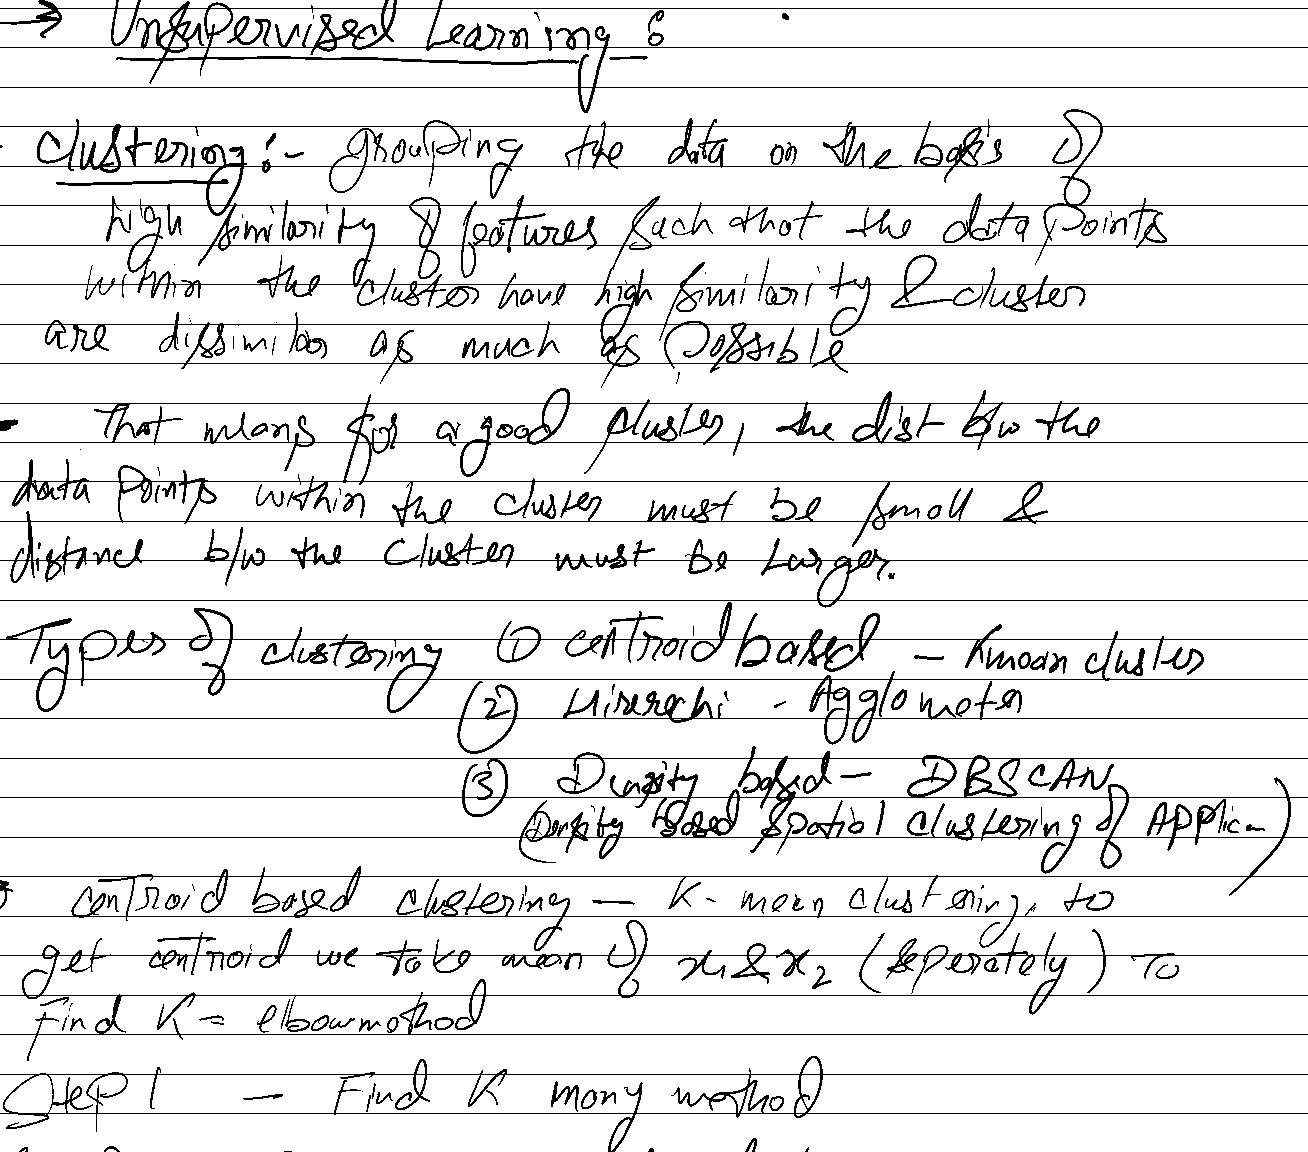

In [18]:
# The image that cv2 has given is numpy array format, we need to convert it to image 
final_image = Image.fromarray(image_bw)
final_image

In [19]:
# So we will use the black and white and Lets configure our LLM model

gemini_key = os.getenv('Google_API_Key1')
genai.configure(api_key = gemini_key)
model = genai.GenerativeModel('gemini-2.5-flash-lite',
generation_config = {'temperature':0.5})

In [20]:
prompt ='''
<Role> YOu are an OCR(Optical Character Application)
<Goal> Identify the characters in handwritten notes
<Context> User has provided the image of the handwritten notes.
<Instruction> 
* Do not generate any new content.
* You can complete a word which is not recognised based on the english dictionary with coorect grammer.
* Output should be well formatted
'''

In [21]:
response  = model.generate_content([prompt,final_image])
print(response.text)

-> Unsupervised Learning &

- Clustering:- Grouping the data on the basis of
High Similarity of features such that the data points
within the cluster have high similarity & clusters
are dissimilar as much as possible

- That means for a good cluster, the dist b/w the
data points within the cluster must be small &
distance b/w the cluster must be larger.

Types of clustering:
(1) Centroid based - K-mean clusters
(2) Hierarchi - Agglomerative
(3) Density based - DBSCAN
(Density Based Spatial Clustering of Applications)

- Centroid based clustering - K-mean clustering, to
get centroid we take mean of x1 & x2 (separately) to
find K = elbow method

Step 1 - Find K many method


## EXTRACTING TEXT FROM WORD DOC

In [26]:
# pip install python-docx

In [27]:
from docx import Document

In [28]:
file = Document('Latest Resume Nidhim Soni-1.docx')

In [29]:
doc_text = ''
for p in file.paragraphs:
    doc_text = doc_text + p.text + '\n'

print(doc_text)

Nidhim Soni	Email: nidhimsoni24@gmail.com
Data Analyst / Junior Data Scientist | AWS | SQL | 
|Dashboarding | EDA| Generative AI	Mobile: +91 8630219099
LinkedIn | GitHub	Gurgaon, Haryana
Summary

Analytical and disciplined Data Scientist & Analyst with a strong grounding in mathematics and a consistent track record of academic and extracurricular achievement. Currently enrolled in the PGP in Data Science (GenAI) at the Great Lakes Institute of Management, I combine quantitative skills with the teamwork, resilience, and strategic thinking built through leadership roles and sports participation. I’m known for my structured work style, attention to detail, and ability to present insights clearly. My strengths include communication, critical thinking, problem-solving, adaptability, and emotional intelligence — qualities that help me collaborate effectively and bring clarity to complex data challenges. I bring a blend of technical skill, disciplined execution, and strong interpersonal abili